### Import libs

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime

from pyramid.arima import auto_arima

### Read data

In [2]:
df = pd.read_csv("data-wrss9.csv", parse_dates=["Date"], index_col=0)

### Rename columns

In [3]:
df.columns

Index(['Total confirmed cases', 'Total deaths', 'Total recovered'], dtype='object')

In [4]:
df.rename(columns={'Total confirmed cases':'TotalConfirmedCases',
                   'Total deaths':'TotalDeaths',
                   'Total recovered':'TotalRecovered'
                  }, inplace=True)

### Data Analysis

In [5]:
df.head()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Jan 23,555,0,0
Jan 24,653,18,30
Jan 25,941,26,36
Jan 26,2019,56,49
Jan 27,2794,80,54


In [6]:
df.tail()

,TotalConfirmedCases,TotalDeaths,TotalRecovered
Date,,,
Apr 2,941202,47631,198075
Apr 3,1029516,54153,219868
Apr 4,1139112,61144,236203
Apr 5,1214487,65605,253626
Apr 6,1279336,69844,272671


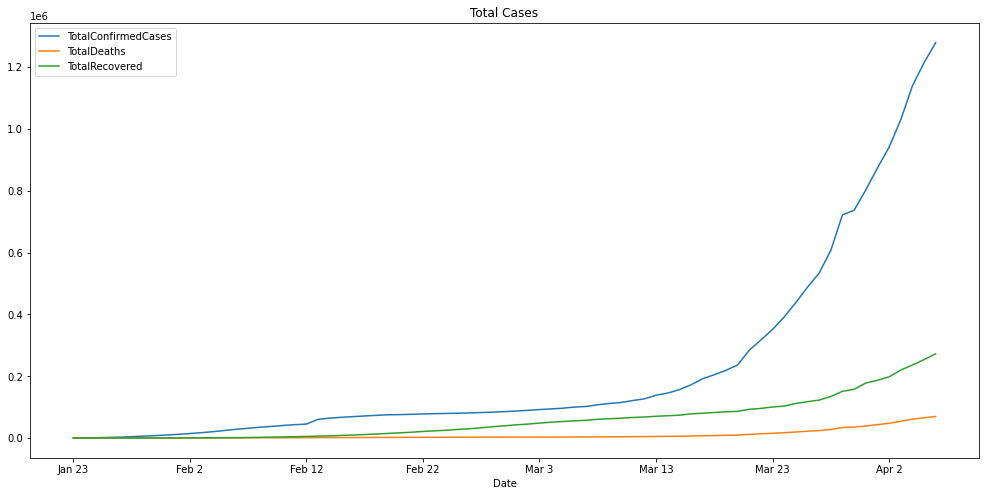

In [7]:
df.TotalConfirmedCases.plot(title="Total Cases", figsize=(17, 8), legend=True)
df.TotalDeaths.plot(figsize=(17, 8), legend=True)
df.TotalRecovered.plot(figsize=(17, 8), legend=True)

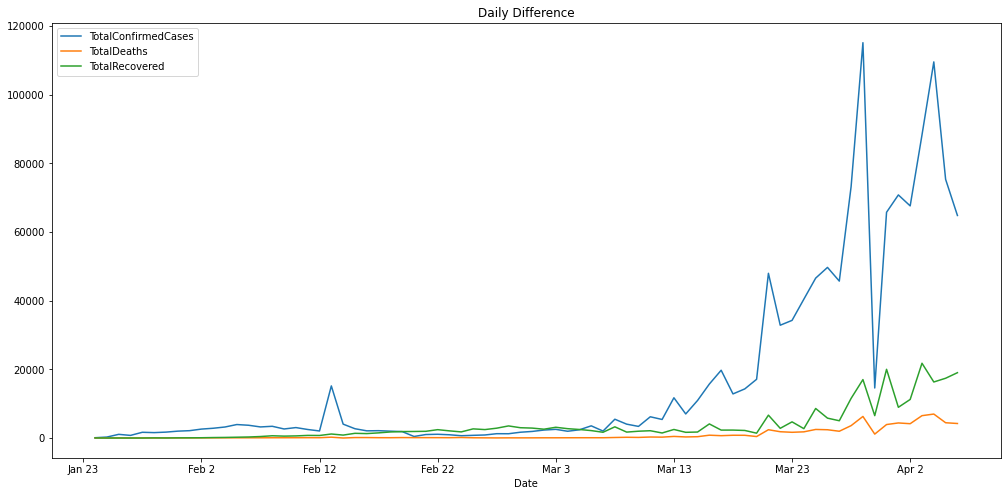

In [8]:
(df.TotalConfirmedCases - df.TotalConfirmedCases.shift(1)).plot(title="Daily Difference", figsize=(17, 8), legend=True)
(df.TotalDeaths - df.TotalDeaths.shift(1)).plot(figsize=(17, 8), legend=True)
(df.TotalRecovered - df.TotalRecovered.shift(1)).plot(figsize=(17, 8), legend=True)

### Constants for predictions

In [9]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(df.index[-1] + ' 2020','%b %d %Y') + datetime.timedelta(days = 1)

### Arima for confirmed cases

In [10]:
confirmed_model = auto_arima(df.TotalConfirmedCases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1597.185, BIC=1610.927, Fit time=3.995 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1626.439, BIC=1631.020, Fit time=0.052 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1611.782, BIC=1618.653, Fit time=1.158 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1596.204, BIC=1603.076, Fit time=0.892 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1597.527, BIC=1606.689, Fit time=0.787 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1596.675, BIC=1605.837, Fit time=0.964 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 8.107 seconds


In [11]:
confirmed_model.aic()

1596.2042194861701

In [12]:
confirmed_model.fit(df.TotalConfirmedCases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [13]:
new_cases_forecast = confirmed_model.predict(n_periods=predicted_days)

In [14]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(new_cases_forecast[x])))

2020-04-07 - 1358652
2020-04-08 - 1439062
2020-04-09 - 1520565
2020-04-10 - 1603162
2020-04-11 - 1686851


### Arima for death cases

In [15]:
deaths_model = auto_arima(df.TotalDeaths,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1183.334, BIC=1197.077, Fit time=2.356 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1207.553, BIC=1212.133, Fit time=0.030 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1196.156, BIC=1203.027, Fit time=0.679 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1183.126, BIC=1189.998, Fit time=0.439 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1184.991, BIC=1194.153, Fit time=1.033 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1184.801, BIC=1193.963, Fit time=1.200 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 6.010 seconds


In [16]:
deaths_model.aic()

1183.1262300676503

In [17]:
deaths_model.fit(df.TotalDeaths)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [18]:
death_forecast = deaths_model.predict(n_periods=predicted_days)

In [19]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(death_forecast[x])))

2020-04-07 - 74885
2020-04-08 - 79996
2020-04-09 - 85177
2020-04-10 - 90427
2020-04-11 - 95747


### Arima for recovered cases

In [20]:
recovered_model = auto_arima(df.TotalRecovered,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1338.392, BIC=1352.135, Fit time=2.355 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1389.361, BIC=1393.942, Fit time=0.025 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1357.382, BIC=1364.253, Fit time=0.834 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1351.907, BIC=1358.779, Fit time=0.826 seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=1331.949, BIC=1347.982, Fit time=4.294 seconds
Fit ARIMA: order=(3, 2, 1); AIC=1465.906, BIC=1479.649, Fit time=4.866 seconds
Fit ARIMA: order=(3, 2, 3); AIC=1332.538, BIC=1350.862, Fit time=6.410 seconds
Fit ARIMA: order=(2, 2, 1); AIC=1336.709, BIC=1348.162, Fit time=2.122 seconds
Fit ARIMA: order=(4, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 2, 2); AIC=1437.527, BIC=1455.851, Fit time=12.830 seconds
Total fit time: 37.431 seconds


In [21]:
recovered_model.aic()

1331.9487226901902

In [22]:
recovered_model.fit(df.TotalRecovered)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [23]:
recovered_forecast = recovered_model.predict(n_periods=predicted_days)

In [24]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(recovered_forecast[x])))

2020-04-07 - 292638
2020-04-08 - 313120
2020-04-09 - 334476
2020-04-10 - 356568
2020-04-11 - 379314
